In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import rasterio
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
import gdown
import geopandas as gpd
import os

## Download all data using `gdown` and organize into folders

In [3]:
#Download stable locations for coregistration
url = 'https://drive.google.com/drive/u/1/folders/1VEEDJDZShlFcNc70kdno4NwUU_nO_cXA'
k13_stable_folder='../data/vectors/kid_stable'
# gdown.download_folder(url, output=k13_stable_folder, quiet=False, use_cookies=False)

url = 'https://drive.google.com/drive/u/1/folders/1Hg963E9A3uvCLroxNEDt3_niHI7lwFN1'
m14_stable_folder='../data/vectors/mel_stable'
# gdown.download_folder(url, output=m14_stable_folder, quiet=False, use_cookies=False)

k13_stable_files = sorted(Path(k13_stable_folder).glob('*.tif'))
k13_stable_files = [i.as_posix() for i in k13_stable_files]

m14_stable_files = sorted(Path(m14_stable_folder).glob('*.tif'))
m14_stable_files = [i.as_posix() for i in m14_stable_files]

In [4]:
#Download KID-13 DEMs
url = 'https://drive.google.com/drive/u/1/folders/1u6UxBlPMZmzgvfbA5-kOsVX_mJ1J55kL'
k13_dem_folder='../data/dems/k13'
# gdown.download_folder(url, output=k13_dem_folder, quiet=False, use_cookies=False)

In [5]:
#Download MEL-14 DEMs
url = 'https://drive.google.com/drive/u/1/folders/1WkPjWOsFvu3nW9gT4NtuXNg3xSD6OF9p'
m14_dem_folder='../data/dems/m14'
# gdown.download_folder(url, output=m14_dem_folder, quiet=False, use_cookies=False)

In [6]:
#Download masks for clipping
url = 'https://drive.google.com/drive/u/1/folders/14jvvzh3dSNO140nXurEaMokyDvr6KidB'
k13_mask_folder='../data/vectors/kid_mask'
# gdown.download_folder(url, output=k13_mask_folder, quiet=False, use_cookies=False)

url = 'https://drive.google.com/drive/u/1/folders/1jSSD9YJ6JzxyZDanQrNMIsBVVn6ZGubF'
m14_mask_folder='../data/vectors/mel_mask'
# gdown.download_folder(url, output=m14_mask_folder, quiet=False, use_cookies=False)

In [7]:
k13_wsyr1_dem_files = sorted(Path(k13_dem_folder).glob('wsyr1/*.tif'))
k13_wsyr1_dem_files = [i.as_posix() for i in k13_wsyr1_dem_files]

k13_dsyr1_dem_files = sorted(Path(k13_dem_folder).glob('dsyr1/*.tif'))
k13_dsyr1_dem_files = [i.as_posix() for i in k13_dsyr1_dem_files]

k13_wsyr2_dem_files = sorted(Path(k13_dem_folder).glob('wsyr2/*.tif'))
k13_wsyr2_dem_files = [i.as_posix() for i in k13_wsyr2_dem_files]

m14_wsyr1_dem_files = sorted(Path(m14_dem_folder).glob('wsyr1/*.tif'))
m14_wsyr1_dem_files = [i.as_posix() for i in m14_wsyr1_dem_files]

m14_dsyr1_dem_files = sorted(Path(m14_dem_folder).glob('dsyr1/*.tif'))
m14_dsyr1_dem_files = [i.as_posix() for i in m14_dsyr1_dem_files]

m14_wsyr2_dem_files = sorted(Path(m14_dem_folder).glob('wsyr2/*.tif'))
m14_wsyr2_dem_files = [i.as_posix() for i in m14_wsyr2_dem_files]

In [8]:
k13_wsyr1_dem_files, k13_dsyr1_dem_files, k13_wsyr2_dem_files, m14_wsyr1_dem_files, m14_dsyr1_dem_files, m14_wsyr2_dem_files

(['../data/dems/k13/wsyr1/K13_lidar_20201109_cc.tif',
  '../data/dems/k13/wsyr1/K13_lidar_20210513_cc.tif',
  '../data/dems/k13/wsyr1/K13_sfm_20201109_cc.tif',
  '../data/dems/k13/wsyr1/K13_sfm_20210208_cc.tif',
  '../data/dems/k13/wsyr1/K13_sfm_20210406_cc.tif',
  '../data/dems/k13/wsyr1/K13_sfm_20210513_cc.tif'],
 ['../data/dems/k13/dsyr1/K13_lidar_20210604_cc.tif',
  '../data/dems/k13/dsyr1/K13_lidar_20210913_cc.tif',
  '../data/dems/k13/dsyr1/K13_sfm_20210604_cc.tif',
  '../data/dems/k13/dsyr1/K13_sfm_20210819_cc.tif',
  '../data/dems/k13/dsyr1/K13_sfm_20210913_cc.tif'],
 ['../data/dems/k13/wsyr2/K13_lidar_20211007_cc.tif',
  '../data/dems/k13/wsyr2/K13_lidar_20220531_cc.tif',
  '../data/dems/k13/wsyr2/K13_sfm_20211007_cc.tif',
  '../data/dems/k13/wsyr2/K13_sfm_20220208_cc.tif',
  '../data/dems/k13/wsyr2/K13_sfm_20220503_cc.tif',
  '../data/dems/k13/wsyr2/K13_sfm_20220531_cc.tif'],
 ['../data/dems/m14/wsyr1/M14_lidar_20201203_cc.tif',
  '../data/dems/m14/wsyr1/M14_sfm_20201203_cc.t

## Define CRS for data using CRS from masks

In [9]:
k13_mask_path = '../data/vectors/kid_mask/K13_mask.shp'
m14_mask_path = '../data/vectors/mel_mask/MEL14_Mask.shp'

# grab shapefile crs to write to rasters
k13_crs = gpd.read_file(k13_mask_path).crs
k13_mask_gdf = gpd.read_file(k13_mask_path)

m14_crs = gpd.read_file(m14_mask_path).crs
m14_mask_gdf = gpd.read_file(m14_mask_path)

In [10]:
k13_stable = dict()
for i in range(len(k13_stable_files)):
    k13_stable[i] = rioxarray.open_rasterio(k13_stable_files[i], masked=True).squeeze()
    k13_stable[i].rio.write_crs(k13_crs, inplace=True)

m14_stable = dict()
for i in range(len(m14_stable_files)):
    m14_stable[i] = rioxarray.open_rasterio(m14_stable_files[i], masked=True).squeeze()
    m14_stable[i].rio.write_crs(m14_crs, inplace=True)

## Directory management

In [11]:
parent_dir = '../data/dems/'

k13_dir_wsyr1= 'k13_results/wsyr1/'
k13_dir_dsyr1= 'k13_results/dsyr1/'
k13_dir_wsyr2= 'k13_results/wsyr2/'
k13_results_wsyr1 = os.path.join(parent_dir, k13_dir_wsyr1)
k13_results_dsyr1 = os.path.join(parent_dir, k13_dir_dsyr1)
k13_results_wsyr2 = os.path.join(parent_dir, k13_dir_wsyr2)
if not os.path.exists(k13_results_wsyr1):
    os.makedirs(k13_results_wsyr1)
if not os.path.exists(k13_results_dsyr1):    
    os.makedirs(k13_results_dsyr1)
if not os.path.exists(k13_results_wsyr2):
    os.makedirs(k13_results_wsyr2)

m14_dir_wsyr1= 'm14_results/wsyr1/'
m14_dir_dsyr1= 'm14_results/dsyr1/'
m14_dir_wsyr2= 'm14_results/wsyr2/'
m14_results_wsyr1 = os.path.join(parent_dir, m14_dir_wsyr1)
m14_results_dsyr1 = os.path.join(parent_dir, m14_dir_dsyr1)
m14_results_wsyr2 = os.path.join(parent_dir, m14_dir_wsyr2)
if not os.path.exists(m14_results_wsyr1):
    os.makedirs(m14_results_wsyr1)
if not os.path.exists(m14_results_dsyr1):    
    os.makedirs(m14_results_dsyr1)
if not os.path.exists(m14_results_wsyr2):
    os.makedirs(m14_results_wsyr2)

## Clip and reproject KID-13 data

In [12]:
#Wet season year 1
dates=['20201109_lidar', '20210513_lidar', '20201109_sfm', '20210208_sfm', '20210406_sfm', '20210513_sfm']
k13_wsyr1 = dict()
k13_wsyr1_clip = dict()
for i in range(len(k13_wsyr1_dem_files)):
    k13_wsyr1[i] = rioxarray.open_rasterio(k13_wsyr1_dem_files[i]).squeeze()
    k13_wsyr1[i].rio.write_crs(k13_crs, inplace=True)
    k13_wsyr1_clip[i] = k13_wsyr1[i].rio.clip(k13_mask_gdf.geometry)
    k13_wsyr1_clip[i].rio.write_nodata(-9999, encoded=True, inplace=True)
k13_wsyr1_clip[0].rio.to_raster(k13_results_wsyr1+'k13_'+dates[0]+'.tif')

k13_wsyr1_reproj = dict()
for x in range(len(k13_wsyr1_dem_files)-1):
    k13_wsyr1_reproj[x] = k13_wsyr1_clip[x+1].rio.reproject_match(k13_wsyr1_clip[0], resampling = 3)
    k13_wsyr1_reproj[x].rio.to_raster(k13_results_wsyr1+'k13_'+dates[x+1]+'.tif')

#Dry season year 1
dates=['20210604_lidar', '20210913_lidar', '20210604_sfm', '20210819_sfm', '20210913_sfm']
k13_dsyr1 = dict()
k13_dsyr1_clip = dict()
for i in range(len(k13_dsyr1_dem_files)):
    k13_dsyr1[i] = rioxarray.open_rasterio(k13_dsyr1_dem_files[i]).squeeze()
    k13_dsyr1[i].rio.write_crs(k13_crs, inplace=True)
    k13_dsyr1_clip[i] = k13_dsyr1[i].rio.clip(k13_mask_gdf.geometry)
    k13_dsyr1_clip[i].rio.write_nodata(-9999, encoded=True, inplace=True)
k13_dsyr1_clip[0].rio.to_raster(k13_results_dsyr1+'k13_'+dates[0]+'.tif')

k13_dsyr1_reproj = dict()
for x in range(len(k13_dsyr1_dem_files)-1):
    k13_dsyr1_reproj[x] = k13_dsyr1_clip[x+1].rio.reproject_match(k13_dsyr1_clip[0], resampling = 3)
    k13_dsyr1_reproj[x].rio.to_raster(k13_results_dsyr1+'k13_'+dates[x+1]+'.tif')

#Wet season year 2
dates=['20211007_lidar', '20220531_lidar', '20211007_sfm', '20220208_sfm', '20220503_sfm', '20220531_sfm']
k13_wsyr2 = dict()
k13_wsyr2_clip = dict()
for i in range(len(k13_wsyr2_dem_files)):
    k13_wsyr2[i] = rioxarray.open_rasterio(k13_wsyr2_dem_files[i]).squeeze()
    k13_wsyr2[i].rio.write_crs(k13_crs, inplace=True)
    k13_wsyr2_clip[i] = k13_wsyr2[i].rio.clip(k13_mask_gdf.geometry)
    k13_wsyr2_clip[i].rio.write_nodata(-9999, encoded=True, inplace=True)
k13_wsyr2_clip[0].rio.to_raster(k13_results_wsyr2+'k13_'+dates[0]+'.tif')

k13_wsyr2_reproj = dict()
for x in range(len(k13_wsyr2_dem_files)-1):
    k13_wsyr2_reproj[x] = k13_wsyr2_clip[x+1].rio.reproject_match(k13_wsyr2_clip[0], resampling = 3)
    k13_wsyr2_reproj[x].rio.to_raster(k13_results_wsyr2+'k13_'+dates[x+1]+'.tif')

## Clip and reproject MEL-14 data

In [13]:
#Wet season year 1
dates = ['20201203_lidar', '20201203_sfm', '20210224_sfm']
m14_wsyr1 = dict()
m14_wsyr1_clip = dict()
for i in range(len(m14_wsyr1_dem_files)):
    m14_wsyr1[i] = rioxarray.open_rasterio(m14_wsyr1_dem_files[i]).squeeze()
    m14_wsyr1[i].rio.write_crs(m14_crs, inplace=True)
    m14_wsyr1_clip[i] = m14_wsyr1[i].rio.clip(m14_mask_gdf.geometry)
    m14_wsyr1_clip[i].rio.write_nodata(-9999, encoded=True, inplace=True)
m14_wsyr1_clip[0].rio.to_raster(m14_results_wsyr1+'m14_'+dates[0]+'.tif')

m14_wsyr1_reproj = dict()
for x in range(len(m14_wsyr1_dem_files)-1):
    m14_wsyr1_reproj[x] = m14_wsyr1_clip[x+1].rio.reproject_match(m14_wsyr1_clip[0], resampling = 3)
    m14_wsyr1_reproj[x].rio.to_raster(m14_results_wsyr1+'m14_'+dates[x+1]+'.tif')

#Dry season year 1
dates = ['20210603_lidar', '20210914_lidar', '20210603_sfm', '20210914_sfm']
m14_dsyr1 = dict()
m14_dsyr1_clip = dict()
for i in range(len(m14_dsyr1_dem_files)):
    m14_dsyr1[i] = rioxarray.open_rasterio(m14_dsyr1_dem_files[i]).squeeze()
    m14_dsyr1[i].rio.write_crs(m14_crs, inplace=True)
    m14_dsyr1_clip[i] = m14_dsyr1[i].rio.clip(m14_mask_gdf.geometry)
    m14_dsyr1_clip[i].rio.write_nodata(-9999, encoded=True, inplace=True)
m14_dsyr1_clip[0].rio.to_raster(m14_results_dsyr1+'m14_'+dates[0]+'.tif')

m14_dsyr1_reproj = dict()
for x in range(len(m14_dsyr1_dem_files)-1):
    m14_dsyr1_reproj[x] = m14_dsyr1_clip[x+1].rio.reproject_match(m14_dsyr1_clip[0], resampling = 3)
    m14_dsyr1_reproj[x].rio.to_raster(m14_results_dsyr1+'m14_'+dates[x+1]+'.tif')

#Wet season year 2
dates = ['20220309_lidar', '20220601_lidar', '20220309_sfm', '20220316_sfm', '20220324_sfm', '20220411_sfm', '20220428_sfm', '20220601_sfm']
m14_wsyr2 = dict()
m14_wsyr2_clip = dict()
for i in range(len(m14_wsyr2_dem_files)):
    m14_wsyr2[i] = rioxarray.open_rasterio(m14_wsyr2_dem_files[i]).squeeze()
    m14_wsyr2[i].rio.write_crs(m14_crs, inplace=True)
    m14_wsyr2_clip[i] = m14_wsyr2[i].rio.clip(m14_mask_gdf.geometry)
    m14_wsyr2_clip[i].rio.write_nodata(-9999, encoded=True, inplace=True)
m14_wsyr2_clip[0].rio.to_raster(m14_results_wsyr2+'m14_'+dates[0]+'.tif')

m14_wsyr2_reproj = dict()
for x in range(len(m14_wsyr2_dem_files)-1):
    m14_wsyr2_reproj[x] = m14_wsyr2_clip[x+1].rio.reproject_match(m14_wsyr2_clip[0], resampling = 3)
    m14_wsyr2_reproj[x].rio.to_raster(m14_results_wsyr2+'m14_'+dates[x+1]+'.tif')

## Plot some pre-coregistered data for sanity check

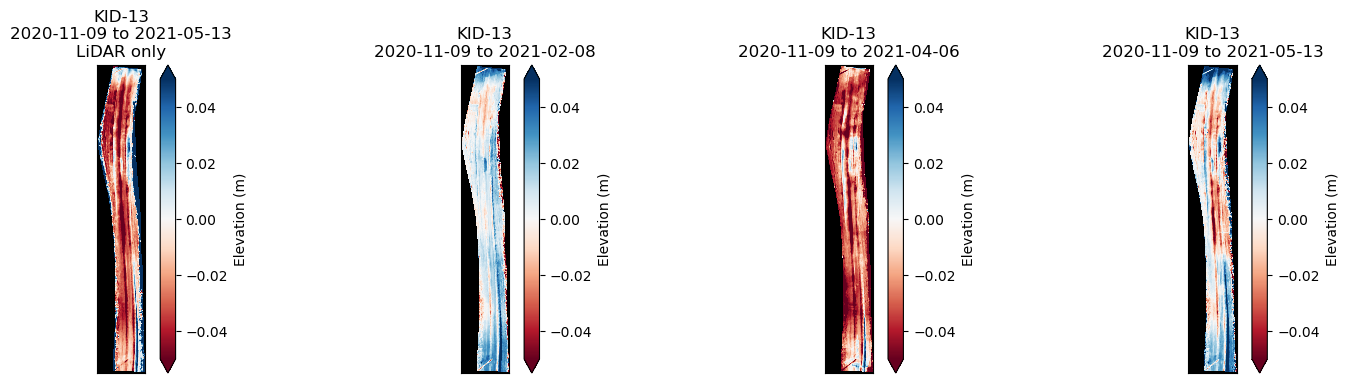

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

m0 = ax[0].imshow(k13_wsyr1_reproj[0]-k13_wsyr1_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[0].set_title('KID-13\n2020-11-09 to 2021-05-13\nLiDAR only')
fig.colorbar(m0, label='Elevation (m)', extend='both', ax=ax[0])
ax[0].set_facecolor('k')
ax[0].set_xticks(())
ax[0].set_yticks(());

m1 = ax[1].imshow(k13_wsyr1_reproj[2]-k13_wsyr1_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[1].set_title('KID-13\n2020-11-09 to 2021-02-08')
fig.colorbar(m1, label='Elevation (m)', extend='both', ax=ax[1])
ax[1].set_facecolor('k')
ax[1].set_xticks(())
ax[1].set_yticks(());

m2 = ax[2].imshow(k13_wsyr1_reproj[3]-k13_wsyr1_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[2].set_title('KID-13\n2020-11-09 to 2021-04-06')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[2])
ax[2].set_facecolor('k')
ax[2].set_xticks(())
ax[2].set_yticks(());

m3 = ax[3].imshow(k13_wsyr1_reproj[4]-k13_wsyr1_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[3].set_title('KID-13\n2020-11-09 to 2021-05-13')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[3])
ax[3].set_facecolor('k')
ax[3].set_xticks(())
ax[3].set_yticks(());

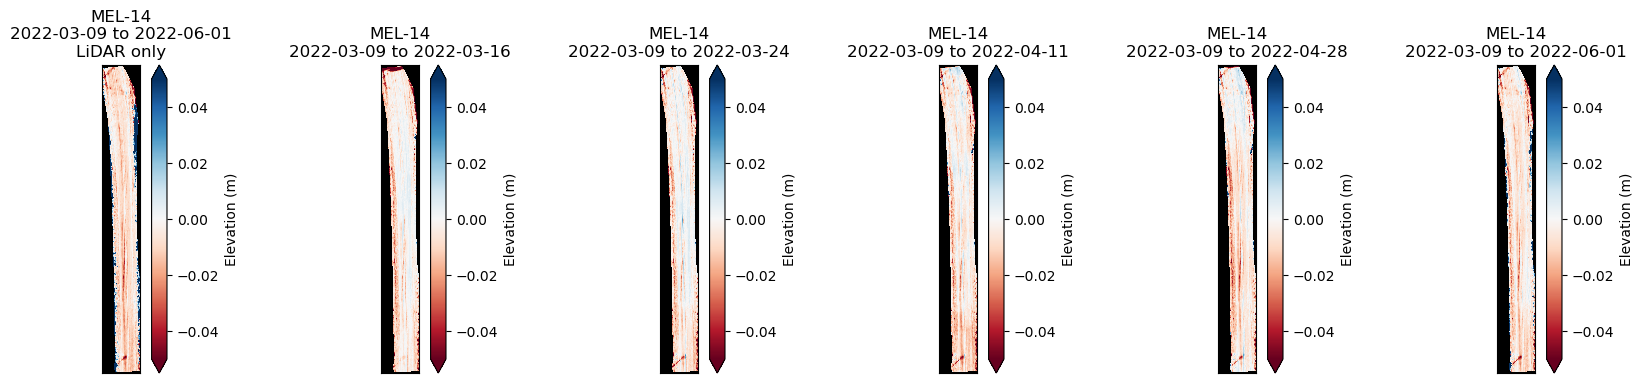

In [15]:
fig, ax = plt.subplots(1, 6, figsize=(21,4))

m0 = ax[0].imshow(m14_wsyr2_reproj[0]-m14_wsyr2_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[0].set_title('MEL-14\n2022-03-09 to 2022-06-01\nLiDAR only')
fig.colorbar(m0, label='Elevation (m)', extend='both', ax=ax[0])
ax[0].set_facecolor('k')
ax[0].set_xticks(())
ax[0].set_yticks(());

m1 = ax[1].imshow(m14_wsyr2_reproj[2]-m14_wsyr2_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[1].set_title('MEL-14\n2022-03-09 to 2022-03-16')
fig.colorbar(m1, label='Elevation (m)', extend='both', ax=ax[1])
ax[1].set_facecolor('k')
ax[1].set_xticks(())
ax[1].set_yticks(());

m2 = ax[2].imshow(m14_wsyr2_reproj[3]-m14_wsyr2_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[2].set_title('MEL-14\n2022-03-09 to 2022-03-24')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[2])
ax[2].set_facecolor('k')
ax[2].set_xticks(())
ax[2].set_yticks(());

m2 = ax[3].imshow(m14_wsyr2_reproj[4]-m14_wsyr2_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[3].set_title('MEL-14\n2022-03-09 to 2022-04-11')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[3])
ax[3].set_facecolor('k')
ax[3].set_xticks(())
ax[3].set_yticks(());

m2 = ax[4].imshow(m14_wsyr2_reproj[5]-m14_wsyr2_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[4].set_title('MEL-14\n2022-03-09 to 2022-04-28')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[4])
ax[4].set_facecolor('k')
ax[4].set_xticks(())
ax[4].set_yticks(());

m2 = ax[5].imshow(m14_wsyr2_reproj[6]-m14_wsyr2_clip[0], cmap = 'RdBu', vmin=-0.05, vmax=0.05)
ax[5].set_title('MEL-14\n2022-03-09 to 2022-06-01')
fig.colorbar(m2, label='Elevation (m)', extend='both', ax=ax[5])
ax[5].set_facecolor('k')
ax[5].set_xticks(())
ax[5].set_yticks(());